# Récupération des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from tqdm import tqdm
import os

In [ ]:
file_path_2000 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g08_y2000_v1-0-0.nc'
xrs_2000 = xr.open_dataset(file_path_2000)['xrsb_flux'].to_series().resample('H').max()

file_path_2001 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g08_y2001_v1-0-0.nc'
xrs_2001 = xr.open_dataset(file_path_2001)['xrsb_flux'].to_series().resample('H').max()

file_path_2002 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g08_y2002_v1-0-0.nc'
xrs_2002 = xr.open_dataset(file_path_2002)['xrsb_flux'].to_series().resample('H').max()

xrs_1 = pd.concat([xrs_2000, xrs_2001, xrs_2002]).interpolate(method='linear')

<ipython-input-7-934c7a50de98>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  xrs_2000 = xr.open_dataset(file_path_2000)['xrsb_flux'].to_series().resample('H').max()
<ipython-input-7-934c7a50de98>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  xrs_2001 = xr.open_dataset(file_path_2001)['xrsb_flux'].to_series().resample('H').max()
<ipython-input-7-934c7a50de98>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  xrs_2002 = xr.open_dataset(file_path_2002)['xrsb_flux'].to_series().resample('H').max()


In [ ]:
fig = go.Figure()

# Ajouter la trace principale
fig.add_trace(go.Scatter(x=xrs_1.index, y=xrs_1, mode='lines', name='Flux'))

# Définir les zones sur l'axe des ordonnées
fig.update_layout(
    shapes=[
        # Zone pour X > 10^-4
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-4, y1=max(xrs_1),
            fillcolor='rgba(255, 0, 0, 0.2)', line=dict(width=0),
            name='X > 10^-4'
        ),
        # Zone pour M > 10^-5
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-5, y1=10**-4,
            fillcolor='rgba(255, 165, 0, 0.2)', line=dict(width=0),
            name='M > 10^-5'
        ),
        # Zone pour C > 10^-6
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-6, y1=10**-5,
            fillcolor='rgba(255, 255, 0, 0.2)', line=dict(width=0),
            name='C > 10^-6'
        ),
        # Zone pour D > 10^-7
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-7, y1=10**-6,
            fillcolor='rgba(0, 255, 0, 0.2)', line=dict(width=0),
            name='D > 10^-7'
        ),
        # Zone pour B > 10^-8
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-8, y1=10**-7,
            fillcolor='rgba(0, 255, 255, 0.2)', line=dict(width=0),
            name='B > 10^-8'
        ),
        # Zone pour A > 10^-9
        dict(
            type='rect',
            xref='paper', yref='y',
            x0=0, x1=1, y0=10**-9, y1=10**-8,
            fillcolor='rgba(0, 0, 255, 0.2)', line=dict(width=0),
            name='A > 10^-9'
        )
    ],
    showlegend=True,
    legend_title="Zones"
)

# Ajouter des traces invisibles pour les zones avec couleur dans la légende
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='X > 10^-4', line=dict(color='rgba(255, 0, 0, 1)'), showlegend=True
))
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='M > 10^-5', line=dict(color='rgba(255, 165, 0, 1)'), showlegend=True
))
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='C > 10^-6', line=dict(color='rgba(255, 255, 0, 1)'), showlegend=True
))
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='D > 10^-7', line=dict(color='rgba(0, 255, 0, 1)'), showlegend=True
))
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='B > 10^-8', line=dict(color='rgba(0, 255, 255, 1)'), showlegend=True
))
fig.add_trace(go.Scatter(
    x=xrs_1.index, y=[None] * len(xrs_1),  # Trace invisible
    mode='lines', name='A > 10^-9', line=dict(color='rgba(0, 0, 255, 1)'), showlegend=True
))

# Format scientifique pour l'axe des ordonnées
fig.update_layout(
    yaxis_tickformat=".1e"  # Format scientifique avec 3 décimales
)

# Affichage du graphique
fig.show()


In [ ]:
fig = px.line(xrs_1)
fig.update_layout(yaxis_tickformat = '.1e',
                  yaxis_type='log')
fig.show()

In [ ]:
file_path_2011 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g15_y2011_v2-2-0.nc'
xrs_2011 = xr.open_dataset(file_path_2011)['xrsb_flux'].to_series().resample('H').max()
xrs_2011 = xrs_2011[xrs_2011.index >= '2011-09']

file_path_2012 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g15_y2012_v2-2-0.nc'
xrs_2012 = xr.open_dataset(file_path_2012)['xrsb_flux'].to_series().resample('H').max()

file_path_2013 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g15_y2013_v2-2-0.nc'
xrs_2013 = xr.open_dataset(file_path_2013)['xrsb_flux'].to_series().resample('H').max()

file_path_2014 = '/content/drive/MyDrive/Projet Eruption Solaire/sci_xrsf-l2-avg1m_g15_y2014_v2-2-0.nc'
xrs_2014 = xr.open_dataset(file_path_2014)['xrsb_flux'].to_series().resample('H').max()
xrs_2014 = xrs_2014[xrs_2014.index < '2014-06']

xrs_2 = pd.concat([xrs_2011, xrs_2012, xrs_2013, xrs_2014]).interpolate(method = 'linear')

<ipython-input-10-a8b5b0db5d37>:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-10-a8b5b0db5d37>:6: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-10-a8b5b0db5d37>:9: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-10-a8b5b0db5d37>:12: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
xrs = pd.concat([xrs_1, xrs_2]).reset_index(drop=True)

In [ ]:
import plotly.express as px

# Exemple de données xrs
fig = px.line(xrs)

# Calcul des quantiles
quantile_90 = xrs.quantile(0.9)
quantile_95 = xrs.quantile(0.95)
quantile_99 = xrs.quantile(0.99)

# Ajouter des lignes horizontales pour les quantiles
fig.update_layout(
    yaxis_tickformat=".1e",  # Format scientifique
    yaxis_type="log",        # Échelle logarithmique
    yaxis=dict(
        tickvals=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],  # Points spécifiques sur l'axe des ordonnées
        ticktext=["10⁻⁹", "10⁻⁸", "10⁻⁷", "10⁻⁶", "10⁻⁵", "10⁻⁴", "10⁻³", "10⁻²"]  # Texte correspondant
    ),
    shapes=[
        # Ligne pour le quantile 0.9
        dict(
            type="line",
            x0=0, x1=1, xref="paper",  # Ligne couvrant tout l'axe des x
            y0=quantile_90, y1=quantile_90, yref="y",
            line=dict(color="blue", dash="dot")
        ),
        # Ligne pour le quantile 0.95
        dict(
            type="line",
            x0=0, x1=1, xref="paper",
            y0=quantile_95, y1=quantile_95, yref="y",
            line=dict(color="green", dash="dot")
        ),
        # Ligne pour le quantile 0.99
        dict(
            type="line",
            x0=0, x1=1, xref="paper",
            y0=quantile_99, y1=quantile_99, yref="y",
            line=dict(color="red", dash="dot")
        )
    ]
)

# Affichage du graphique
fig.show()


In [ ]:
ps = np.quantile(xrs.values, [0.90, 0.95, 0.99])
steps = [1, 6]

In [ ]:
windows = [xrs[12*i:12*i+4320] for i in range(3840)]

# Baseline

In [ ]:
prec = {}
quant = [0.9, 0.95, 0.99]
for h in steps:
    for i, p in enumerate(ps):
        total_count=0
        count=0
        for window in windows :
            if window.iloc[-1] >= p:
                total_count+=1
                if xrs[window.index[-1]+h] >= p:
                    count+=1
        prec[(h,  quant[i])] = count/total_count

prec

{(1, 0.9): 0.5218508997429306,
 (1, 0.95): 0.38461538461538464,
 (1, 0.99): 0.3,
 (6, 0.9): 0.2930591259640103,
 (6, 0.95): 0.14423076923076922,
 (6, 0.99): 0.03333333333333333}

# Modèle AR

In [ ]:
import time
from sklearn.linear_model import QuantileRegressor

In [ ]:
n = 4320

In [ ]:
ar_prec = {}
quant = [0.9, 0.95, 0.99]
steps = [1]
n, d = 4320, 168
t=4319
h=1
total_count=[0 for c in quant]
count=[0 for c in quant]
e_1 = np.zeros(d)
e_1[0]=1

for window in tqdm(windows):
    X = np.lib.stride_tricks.sliding_window_view(window, d)
    y = window.loc[t-n+d+1:t]
    # Ajuster le modèle LAD (quantile = 0.5 pour LAD)
    model = sm.QuantReg(y, X[:-1]).fit(q=0.5)
    phi_star = model.params.values
    Phi = np.hstack((phi_star.reshape((-1, 1)), np.eye(d)))[:, :-1]


    power_of_Phi = np.linalg.matrix_power(Phi, h).dot(e_1)

    hat_Y = X @ power_of_Phi
    t+=12
    sample_quantile = np.quantile(hat_Y, quant)
    for i, p in enumerate(ps):
      if hat_Y[-1] >= sample_quantile[i]:
        total_count[i]+=1
        if xrs[window.index[-1]+h] >= p:
          count[i]+=1
for i in range(3):
  ar_prec[(h, quant[i])] = count[i]/total_count[i]




100%|██████████| 3840/3840 [1:26:23<00:00,  1.35s/it]


In [ ]:
ar_prec

{(1, 0.9): 0.41019955654101997,
 (1, 0.95): 0.3076923076923077,
 (1, 0.99): 0.17391304347826086}

# FARIMA

In [ ]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma

In [ ]:
def periodogram(Y, lambdas):
    n = len(Y)
    t = Y.index[-1]
    return np.array([
        np.abs(np.sum(Y * np.exp(-1j * lam * (np.arange(1, n+1)))))**2
        for lam in lambdas
    ])

def estimate_d(Y, alpha):
    n = len(Y)
    lambdas = np.linspace(1/n, np.pi, 200)  # Discrétisation de λ
    I_n = periodogram(Y, lambdas)

    def objective(d):
        return np.trapz((2 - 2 * np.cos(lambdas))**d * I_n, lambdas)

    result = minimize(objective, x0=0.3, bounds=[(-0.5, 1 - 1/alpha)])
    return result.x[0]

In [ ]:
farima_prec = {}
quant = [0.9, 0.95, 0.99]
steps = [1]
n = 4320
h=1

total_count=[0 for c in quant]
count=[0 for c in quant]

alphas = []
ds = []

for window in tqdm(windows):
  l = 150
  xi, mu, sigma = genextreme.fit(window.values)
  xi = -xi
  alpha = 1/xi
  d = estimate_d(window, alpha)
  a = np.array([1] + [gamma(j+d)/(gamma(d)*gamma(j+1)) for j in range(1, l+h)])

  b = np.zeros((l))
  b[0]=1
  for i in range(1, l):
    b[i] = -np.sum([a[k]*b[i-k] for k in range(1, i + 1)])

  c = np.zeros((l))
  for r in range(l):
    c[r] = np.sum([a[s+h]*b[r-s] for s in range(r+1)])

  c = c[::-1]
  hat_Y = np.lib.stride_tricks.sliding_window_view(window.values, l) @ c
  sample_quantile = np.quantile(hat_Y, quant)

  alphas.append(alpha)
  ds.append(d)
  for i, p in enumerate(ps):
    if hat_Y[-1] >= sample_quantile[i]:
      total_count[i]+=1
      if xrs[window.index[-1]+h] >= p:
        count[i]+=1
for i in range(3):
  farima_prec[(h, quant[i])] = count[i]/total_count[i]







100%|██████████| 3840/3840 [17:43<00:00,  3.61it/s]


In [ ]:
farima_prec

{(1, 0.9): 0.3938679245283019,
 (1, 0.95): 0.3140096618357488,
 (1, 0.99): 0.21621621621621623}

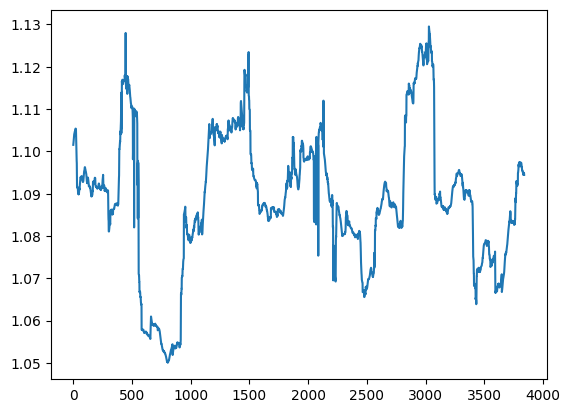

In [ ]:
plt.plot(alphas)

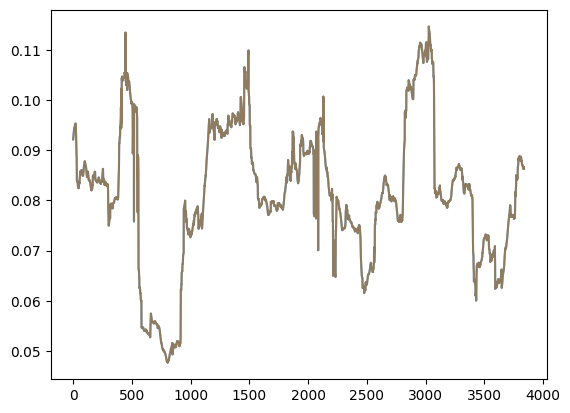

In [ ]:
plt.plot(ds)